Coursework Wind Energy

Importation of data and libraries

In [18]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore warnings
pd.options.mode.chained_assignment = None

In [19]:
# import data
data_wind = pd.read_csv('data_wind.csv', sep=';')
data_wind["Day"] = pd.to_datetime(data_wind["Day"], format='%d.%m.%Y',errors='ignore')

Description of the data

In [20]:
data_wind["Anemometer reading [m/s]"].describe()

count    99.000000
mean      6.995960
std       5.002651
min       0.500000
25%       3.200000
50%       6.700000
75%       8.900000
max      20.300000
Name: Anemometer reading [m/s], dtype: float64

Table of distribution of the wind

In [21]:
data_wind["Speed groups"] = pd.cut(data_wind["Anemometer reading [m/s]"], bins=[0.49,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5,20.5], labels=["0.5-1.5","1.5-2.5","2.5-3.5","3.5-4.5","4.5-5.5","5.5-6.5","6.5-7.5","7.5-8.5","8.5-9.5","9.5-10.5","10.5-11.5","11.5-12.5","12.5-13.5","13.5-14.5","14.5-15.5","15.5-16.5","16.5-17.5","17.5-18.5","18.5-19.5","19.5-20.5"])
hist_data  = data_wind.groupby(data_wind["Speed groups"]).count()
hist_data["ni"] = hist_data["Anemometer reading [m/s]"]
hist_data.drop(["Anemometer reading [m/s]","Day","Time /hour"], axis=1, inplace=True)
hist_data

,ni
Speed groups,
0.5-1.5,14
1.5-2.5,5
2.5-3.5,9
3.5-4.5,10
4.5-5.5,5
5.5-6.5,6
6.5-7.5,10
7.5-8.5,13
8.5-9.5,4


Plot the histogram

<Axes: xlabel='Anemometer reading [m/s]', ylabel='Count'>

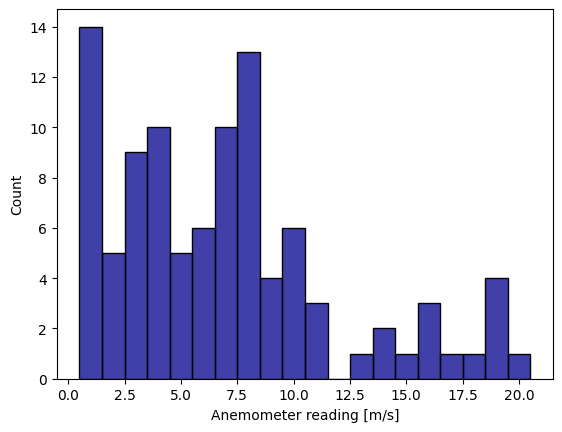

In [22]:
# plot histogram of wind speed
sns.histplot(data_wind["Anemometer reading [m/s]"], color = 'darkblue', bins=[0.5,1.51,2.51,3.51,4.51,5.51,6.51,7.51,8.51,9.51,10.51,11.51,12.51,13.51,14.51,15.51,16.51,17.51,18.51,19.51,20.51])


Table of density of the wind

In [23]:
density_data = hist_data/len(data_wind)
density_data

,ni
Speed groups,
0.5-1.5,0.141414
1.5-2.5,0.050505
2.5-3.5,0.090909
3.5-4.5,0.101010
4.5-5.5,0.050505
5.5-6.5,0.060606
6.5-7.5,0.101010
7.5-8.5,0.131313
8.5-9.5,0.040404


Plot the relative frequency distribution

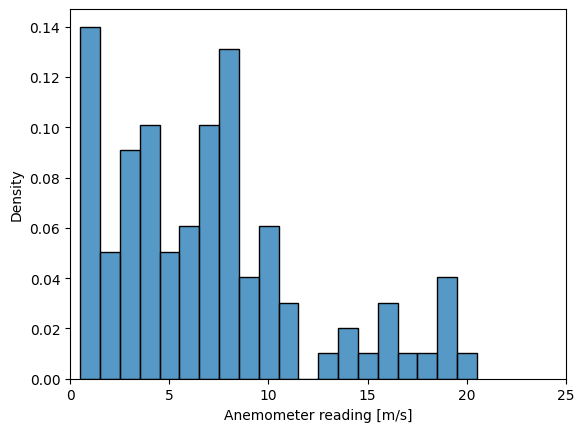

In [42]:
# plot the data
# histogram
sns.histplot(data_wind["Anemometer reading [m/s]"],
             bins=[0.5,1.51,2.51,3.51,4.51,5.51,6.51,7.51,8.51,9.51,10.51,11.51,12.51,13.51,14.51,15.51,16.51,17.51,18.51,19.51,20.51],stat = 'density')
# lim [0,25]
plt.xlim(0,25)
plt.show()


Table of useful data for analysis

In [25]:
hist_data["Mid class value (Ui)"] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
hist_data.reset_index(inplace=True)
hist_data["niUi"] = hist_data["ni"]*hist_data["Mid class value (Ui)"]
hist_data["niUi^2"] = hist_data["niUi"]*hist_data["Mid class value (Ui)"]
hist_data["Rfi"] = hist_data["ni"]/hist_data["ni"].sum()
hist_data

,Speed groups,ni,Mid class value (Ui),niUi,niUi^2,Rfi
0,0.5-1.5,14,1,14,14,0.141414
1,1.5-2.5,5,2,10,20,0.050505
2,2.5-3.5,9,3,27,81,0.090909
3,3.5-4.5,10,4,40,160,0.101010
4,4.5-5.5,5,5,25,125,0.050505
5,5.5-6.5,6,6,36,216,0.060606
6,6.5-7.5,10,7,70,490,0.101010
7,7.5-8.5,13,8,104,832,0.131313
8,8.5-9.5,4,9,36,324,0.040404
9,9.5-10.5,6,10,60,600,0.060606


Calculation of mean and standard deviation

In [26]:
mean = hist_data["niUi"].sum()/hist_data["ni"].sum()
sigma = np.sqrt((hist_data["niUi^2"].sum()/hist_data["ni"].sum())-mean**2)
print("Mean: ", mean)
print("Standard deviation: ", sigma)

Mean:  6.96969696969697
Standard deviation:  4.9511850340606305


Plot Rayleigh distribution

<Axes: xlabel='Anemometer reading [m/s]', ylabel='Density'>

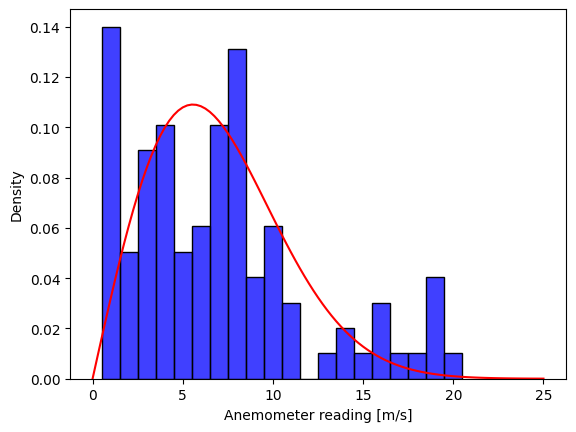

In [37]:
# plot Rayleigh distribution
X = np.linspace(0, 25, 101)
YRayleigh = (np.pi/2)*(X/mean**2)*np.exp(-(np.pi/4)*((X/mean)**2))

plt.plot(X, YRayleigh, color="r", label="Anemometer reading [m/s]")
sns.histplot(data_wind["Anemometer reading [m/s]"],  color="b", label="Anemometer reading [m/s]", bins=[0.5,1.51,2.51,3.51,4.51,5.51,6.51,7.51,8.51,9.51,10.51,11.51,12.51,13.51,14.51,15.51,16.51,17.51,18.51,19.51,20.51], stat="density")


Plot Weibull distribution

k:  1.4356697571347838
c:  7.675983823260405


<Axes: xlabel='Anemometer reading [m/s]', ylabel='Density'>

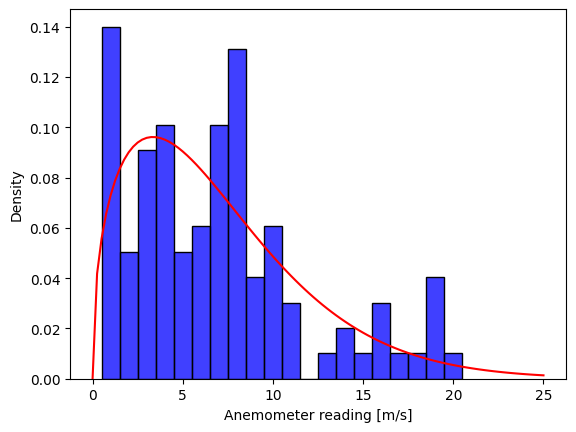

In [43]:
#Weibull distribution
from scipy.special import gamma, factorial
k = (0.9874*mean/sigma)**(1.0983)
x = 1 + 1/k
c = mean/gamma(x)
X = np.linspace(0, 25, 101)
Yweibull = k/c*((X/c)**(k-1))*np.exp(-((X/c)**k))
print("k: ", k)
print("c: ", c)
plt.plot(X, Yweibull, color='r', label='Weibull distribution')
sns.histplot(data_wind["Anemometer reading [m/s]"],  color="b", label="Anemometer reading [m/s]", bins= [0.5,1.51,2.51,3.51,4.51,5.51,6.51,7.51,8.51,9.51,10.51,11.51,12.51,13.51,14.51,15.51,16.51,17.51,18.51,19.51,20.51],stat="density")

Conparison of the two models

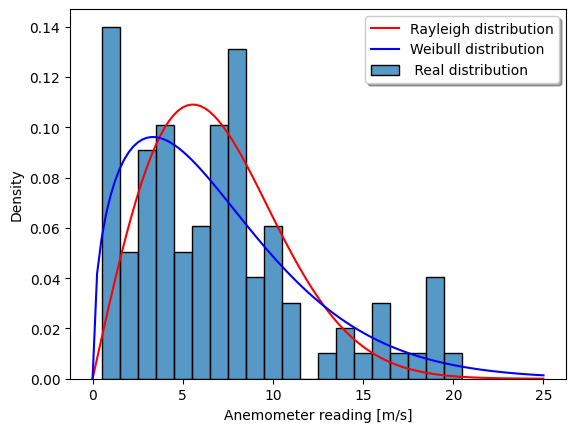

In [45]:
# plot rayleigh and weibull distribution
plt.plot(X, YRayleigh, color="r", label="Rayleigh distribution")
plt.plot(X, Yweibull, color='b', label='Weibull distribution')
sns.histplot(data_wind["Anemometer reading [m/s]"],  label=" Real distribution", bins=[0.5,1.51,2.51,3.51,4.51,5.51,6.51,7.51,8.51,9.51,10.51,11.51,12.51,13.51,14.51,15.51,16.51,17.51,18.51,19.51,20.51],stat="density")
legend = plt.legend(loc='upper right', shadow=True)

In [30]:
# accuracy of the fit
sumweibull = 0
sumrayleigh = 0
for k in range(1, 21):
    sumweibull += abs(hist_data["Rfi"][k-1] - Yweibull[4*k])
    sumrayleigh += abs(hist_data["Rfi"][k-1] - YRayleigh[4*k])
print("sumweibull: ", sumweibull)
print("sumrayleigh: ", sumrayleigh)

sumweibull:  0.4309580048430389
sumrayleigh:  0.47636671877604264


Kinetic energy

In [31]:
Umaxrayleigh = np.sqrt(6/np.pi)*mean
Umaxweibull = ((1+1/k)**(1/k))*c
EcRayleigh = Umaxrayleigh**2/2
EcWeiBull = Umaxweibull**2/2
print("Umaxrayleigh: ", Umaxrayleigh, "EcRayleigh/rhoV: ", EcRayleigh)
print("Umaxweibull: ", Umaxweibull, "EcWeiBull/rhoV: ", EcWeiBull)

Umaxrayleigh:  9.631958106473595 EcRayleigh/rhoV:  46.3873084824312
Umaxweibull:  7.694732308048615 EcWeiBull/rhoV:  29.604452646263585


Variation of wind speed

In [32]:
variation = sigma/mean
print("variation: ", variation)

variation:  0.7103874179304382
